In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 設定目前程式資料夾路徑(務必自行更改)

In [ ]:
folder="/content/drive/MyDrive/解密AI黑盒子分享/"

## 載入所需套件

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
twfont1=plt_font.FontProperties(fname=folder+"字型/kaiu.ttf")
from IPython import display

## 從檔案讀取資料集

In [ ]:
data=np.loadtxt(folder+"資料集/iris_data.csv",delimiter=",")

## 只篩選出山鳶尾(label=0)和雜色鳶尾(label=1)

In [ ]:
data=data[(data[:,4]==0) | (data[:,4]==1)]

### 整理鳶尾花特徵資料集和分類標示資料集

In [ ]:

data_x=(data_x-data_x.mean(axis=0))/data_x.std(axis=0)
data_y=data[:,4]

## 分割訓練資料集和測試資料集的特徵矩陣X、標籤矩陣Y

In [ ]:
Train_X=data_x[:70]
Train_Y=data_y[:70].reshape((-1,1))
Test_X=data_x[70:]
Test_Y=data_y[70:].reshape((-1,1))

## 定義激活函數

In [ ]:
def Sigmoid(z):
  return 1/(1+np.exp(-z))

## 定義模型運算函數

In [ ]:
def F(X):
  z=np.dot(X,W)+B
  return Sigmoid(z)

## 定義損失函數

In [ ]:
def Loss(Yh,Y):
  return -np.sum(Y*np.log(Yh)+(1-Y)*np.log(1-Yh))

## 設定訓練模型的參數

In [ ]:
B=np.random.randn(1).reshape((1,1))
W=np.random.randn( ).reshape((-1,1))
ETA=0.07
Step_W=[]
Step_B=[]
Step_L=[]

## 用迴圈訓練模型

In [ ]:
for epoch in range(2500):
  Step_B.append(float(B))
  Step_W.append(W)
  Yh=F(Train_X)
  W=W-ETA*np.dot(Train_X.T,Yh-Train_Y)
  B=B-ETA*np.sum(Yh-Train_Y)
  loss=Loss(Yh,Train_Y)
  Step_L.append(loss)
  if epoch%5==4:
    print("訓練次數",epoch+1,"損失值",loss)
    display.clear_output(wait=True)

## 觀察訓練過程中的損失函數Loss變化

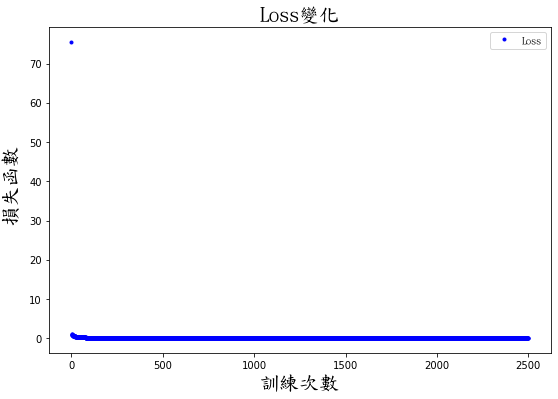

In [ ]:
plt.figure(figsize=(9,6))
plt.title("Loss變化",fontproperties=twfont1,fontsize=20)
plt.xlabel("訓練次數",fontproperties=twfont1,fontsize=20)
plt.ylabel("損失函數",fontproperties=twfont1,fontsize=20)
plt.plot(Step_L,"b.",label="Loss")
plt.legend(prop=twfont1)

## 觀察資料數據和模型函數

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
ax.set_zlim(-2,2)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
x1 = np.arange(-3, 3, 0.1)
x2 = np.arange(-3, 3, 0.1)
x1, x2 = np.meshgrid(x1, x2)
ax.set_xlabel('X1軸(花萼長)',fontproperties=twfont1,fontsize=20)
ax.set_ylabel('x2軸(花萼寬)',fontproperties=twfont1,fontsize=20)
ax.set_zlabel('x3軸(花瓣長)',fontproperties=twfont1,fontsize=20)
surf=ax.plot_surface(x1,x2,,cmap="cool",linewidth=0, alpha=0.5)
ax.scatter3D(Train_X[:,0],Train_X[:,1],Train_X[:,2],c=["b" if i==0 else "r" for i in Train_Y ],marker="o",s=40)
ax.scatter3D(Test_X[:,0],Test_X[:,1],Test_X[:,2],c=["b" if i==0 else "r" for i in Test_Y ],marker="s",s=40)
ax.view_init(elev=20, azim=40)
plt.show()

## 測試資料集的準確度

In [ ]:
TestYh=F(Test_X)
print("測試集的準確度",(np.around(TestYh)==Test_Y).sum()*100/len(Test_Y),"%")